CIFAR10 veri kümesi: uçak, otomobil, kuş, kedi, geyik, köpek, kurbağa, at, gemi gibi nesnelerin görüntülerini içerir.
Görüntü boyutlari 3 kanalli renkli görüntülerdir ve boyutlari 32x32 pikseldir.
Eğitim Adimlari:
1. CIFAR10 veri kümesini yükle ve normalize et. CIFAR10, farkli nesne siniflarindan oluşan bir veri kümesidir ve PyTorch kütüphanesi ile kullanilabilir.
2. Bir evrişimli sinir aği (convolutional neural network) tanimla. Bu ağ, görüntülerin özelliklerini öğrenmek için evrişim ve havuzlama katmanlarindan oluşur.
3. Bir kayip fonksiyonu tanimla. Bu fonksiyon, ağin tahminlerini gerçek etiketlerle karşilaştirarak eğitim sirasinda ağin performansini ölçer.
4. Aği eğitim verisi üzerinde eğit. Bu adimda, modelin ağirliklari ve önyargilari, eğitim verileri kullanilarak optimize edilir ve ağin doğruluğu artirilir.
5. Aği test verisi üzerinde test et. Eğitim tamamlandiktan sonra, modelin gerçek dünya verileri üzerinde nasil performans gösterdiğini değerlendirmek için ağin test verisi üzerinde test edilmesi gerekir.

Bu adimlarin her biri, bir derin öğrenme modelini eğitmek için temel adimlari temsil eder. Her adimin doğru bir şekilde uygulanmasi, modelin iyi bir performans göstermesini sağlar.


1. **PyTorch ve torchvision Kütüphanelerinin İçeri Aktarilmasi**: İlk olarak, PyTorch ve torchvision kütüphaneleri içe aktarilir. PyTorch, derin öğrenme modelleri oluşturmak ve eğitmek için kullanilan bir kütüphane iken, torchvision, görüntü verileri üzerinde çalişmak için özellikle kullanişli olan bir alt kütüphanesidir.

2. **Veri Dönüşümlerinin Tanimlanmasi**: `transforms.Compose()` fonksiyonu, veri dönüşümlerini bir dizi olarak birleştirir. Burada, `transforms.ToTensor()` işlevi, görüntüleri tensörlere dönüştürürken, `transforms.Normalize()` işlevi, görüntü piksellerinin normalleştirilmesini sağlar. Bu, görüntülerin piksel değerlerini (-1 ile 1 arasinda) ortalama ve standart sapma kullanarak normalize eder.

3. **Eğitim ve Test Veri Kümesinin Yüklenmesi**: `torchvision.datasets.CIFAR10()` işlevi, CIFAR10 veri kümesini yükler. CIFAR10, 10 farkli sinifa ait renkli görüntülerden oluşan bir veri kümesidir. `root` parametresi, veri kümesinin kaydedileceği dizini belirtir. `train=True` parametresi, eğitim veri kümesini yüklemek için kullanilirken, `train=False` parametresi test veri kümesini yükler. `download=True` parametresi, veri kümesinin internetten otomatik olarak indirilmesini sağlar. `transform` parametresi, veri dönüşümlerini belirtir.

Bu adimlar, CIFAR10 veri kümesinin yüklenmesi ve tensörlere dönüştürülmesi için gereken ön işlemleri gerçekleştirir.


`(0.5,0.5,0.5),(0.5,0.5,0.5)` Bu parametreler, görüntülerin normalleştirilmesi için kullanilan ortalama ve standart sapma değerlerini belirtir. Normalleştirme, veri ön işleme adimlarindan biridir ve genellikle verilerin ayni ölçekte olmasini sağlamak için yapilir.

- İlk demet, ortalama değerleri temsil eder. (0.5, 0.5, 0.5), her bir kanal için bir ortalama değerdir. RGB görüntülerde her piksel üç kanal içerir (kirmizi, yeşil, mavi), bu nedenle üç tane ortalama değeri vardir. Bu değerler, her pikselin ilgili kanal değerinden çikarilmasiyla normalleştirmeyi gerçekleştirir.

- İkinci demet, standart sapma değerlerini temsil eder. (0.5, 0.5, 0.5), her bir kanal için bir standart sapma değeridir. Standart sapma, veri dağiliminin ne kadar yayildiğini gösteren bir ölçüdür. Bu değerler, piksel değerlerinin bu standart sapma değerine bölünerek normalleştirilmesini sağlar.

Özetle, (0.5, 0.5, 0.5) değerleri, her bir renk kanalinin piksel değerlerini normalize etmek için kullanilan ortalama ve standart sapma değerleridir. Bu sayede, görüntülerin piksel değerleri ortalama sifir ve standart sapma bir olacak şekilde yeniden ölçeklenir, bu da modelin daha iyi öğrenmesini sağlar.

### Data Download

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch. optim as optim
import matplotlib .pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform) #indirecekseniz download=True yapmaniz gerekiyor
test = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform) #indirecekseniz download=True yapmaniz gerekiyor

### Data load

In [3]:
batch_size = 4
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [4]:
def image_show(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

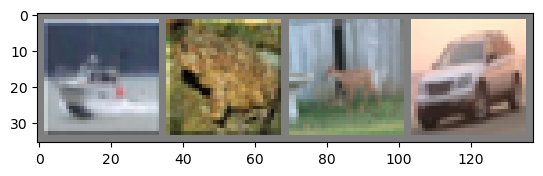

In [10]:
# Sadece bir örneği göstermek için ilk yiğini aliyoruz
images, labels = next(iter(train_loader))

# Image'i göstermek için image_show fonksiyonunu kullaniyoruz
image_show(torchvision.utils.make_grid(images))


In [15]:
images

tensor([[[[ 0.3412,  0.2863,  0.3098,  ...,  0.3490,  0.3490,  0.3882],
          [-0.2627, -0.4275, -0.4039,  ..., -0.3569, -0.3569, -0.3882],
          [-0.3255, -0.5373, -0.5451,  ..., -0.5373, -0.5451, -0.5843],
          ...,
          [ 0.5843,  0.3176,  0.3333,  ...,  0.3647,  0.3804,  0.2863],
          [ 0.5373,  0.2549,  0.2863,  ...,  0.3176,  0.3412,  0.2314],
          [ 0.0353, -0.2941, -0.2471,  ..., -0.2235, -0.2314, -0.2627]],

         [[ 0.4118,  0.3725,  0.3961,  ...,  0.4745,  0.4745,  0.4745],
          [-0.1529, -0.3176, -0.2863,  ..., -0.1765, -0.1686, -0.2471],
          [-0.2549, -0.5137, -0.4980,  ..., -0.4275, -0.4196, -0.4824],
          ...,
          [ 0.5922,  0.3569,  0.3725,  ...,  0.4039,  0.4275,  0.3333],
          [ 0.5451,  0.2941,  0.3255,  ...,  0.3569,  0.3804,  0.2706],
          [ 0.0510, -0.2549, -0.2078,  ..., -0.1843, -0.1922, -0.2235]],

         [[ 0.5137,  0.4824,  0.4902,  ...,  0.5922,  0.6000,  0.6314],
          [ 0.0824, -0.1059, -

### Model kurulumu

- `class CKNet(nn.Module):`: Bu satir, bir sinif tanimlar. `Net` adinda bir sinif oluşturulur. Bu sinif, PyTorch'ta `nn.Module` sinifindan türetilir. Bu, bir sinir aği modelini temsil eder.

- `def __init__(self):`: Bu, sinifin kurucu metodu (constructor) dur. Sinir aği modelinin katmanlari burada tanimlanir.

- `self.conv1 = nn.Conv2d(3, 6, 5)`: Bu satir, bir evrişimli katman (convolutional layer) tanimlar. `nn.Conv2d` sinifi, iki boyutlu bir evrişim işlemi gerçekleştirir. Burada, 3 giriş kanali (renk kanallari), 6 çikiş kanali ve 5x5 boyutunda bir evrişim çekirdeği kullanilmiştir.

- `self.pool = nn.MaxPool2d(2, 2)`: Bu satir, bir maksimum havuzlama katmani (max pooling layer) tanimlar. `nn.MaxPool2d` sinifi, maksimum havuzlama işlemi yapar. Burada, 2x2 boyutunda bir havuzlama çekirdeği kullanilmiştir.

- `self.fc1 = nn.Linear(16 * 5 * 5, 120)`: Bu satir, bir tam bağlantili katman (fully connected layer) tanimlar. `nn.Linear` sinifi, tam bağlantili bir katman oluşturur. Giriş boyutu 16*5*5 (önceki evrişimli katmandan gelen çikişin boyutu), çikiş boyutu ise 120'dir.

- `def forward(self, x):`: Bu, ileri geçiş yöntemidir. Modelin girdi verisini alir ve çiktiyi hesaplar.

- `x = self.pool(F.relu(self.conv1(x)))`: Bu satir, bir evrişimli katmani, ardindan ReLU aktivasyon fonksiyonunu ve sonrasinda bir maksimum havuzlama katmanini içeren bir ileri geçiş işlemi gerçekleştirir.

- `x = self.pool(F.relu(self.conv2(x)))`: Bu satir, ikinci bir evrişimli katmani, ardindan ReLU aktivasyon fonksiyonunu ve sonrasinda bir maksimum havuzlama katmanini içeren bir ileri geçiş işlemi gerçekleştirir.

- `x = x.view(-1, 16 * 5 * 5)`: Bu satir, tensorün boyutunu yeniden şekillendirir. Verilen boyutlar (-1, 16*5*5) olarak belirtilmiştir.

- `x = F.relu(self.fc1(x))`: Bu satir, tam bağlantili bir katmani ve ardindan ReLU aktivasyon fonksiyonunu içeren bir ileri geçiş işlemi gerçekleştirir.

- `x = F.relu(self.fc2(x))`: Bu satir, ikinci bir tam bağlantili katmani ve ardindan ReLU aktivasyon fonksiyonunu içeren bir ileri geçiş işlemi gerçekleştirir.

- `x = self.fc3(x)`: Bu satir, çikiş katmanini içeren bir ileri geçiş işlemi gerçekleştirir. Bu, modelin nihai çiktisini verir.

In [17]:
class CKNet(nn.Module):
    def __init__(self):
        super(CKNet, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.pool(F.relu(self.conv1(x)))
        # If the size is a square you can only specify a single number
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [18]:
use_gpu = True

In [19]:
if use_gpu:
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    if torch.cuda.is_available():
        ckNet = CKNet().to(device)
        print("GPU kullaniliyor")
        print(torch.cuda.device_count())
        print(torch.cuda.get_device_name(0))
else:
    ckNet = CKNet()
    print("CPU kullaniliyor")

cuda:0
GPU kullanılıyor
1
NVIDIA GeForce GTX 1650 Ti


In [20]:
error = nn.CrossEntropyLoss()
optimizer = optim.SGD(ckNet.parameters(), lr=0.001, momentum=0.8)

In [21]:
for epoch in range(10):
    run_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = ckNet(inputs)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()

        run_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, run_loss / 2000))
            loss = 0.0
print("Eğitim tamamlandi")

[1,  2000] loss: 2.294
[1,  4000] loss: 4.367
[1,  6000] loss: 6.244
